In [1]:
import os
import cv2
import numpy as np
#Encoding and Split data into Train/Test Sets
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
#Tensorflow Keras CNN Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, BatchNormalization,Activation,MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
#Plot Images
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# dataset directory:
folder_dir= '/kaggle/input/flowers-recognition/flowers'
import os

# List all folders in the specified directory
folders = [f for f in os.listdir(folder_dir) if os.path.isdir(os.path.join(folder_dir, f))]

# Print the list of folders
print("Folders in the directory:")
for folder in folders:
    print(folder)

Folders in the directory:
dandelion
daisy
sunflower
tulip
rose


In [3]:
import os
import shutil

folder_dir = '/kaggle/input/flowers-recognition/flowers'
output_dir = '/path/to/output'  # Specify the path to the output folder where you want to copy the selected folders

# List of folders to keep (excluding 'dandelion')
folders_to_keep = ['sunflower', 'dandelion']

# Create the output folder if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Iterate through the folders in the input directory
for folder_name in os.listdir(folder_dir):
    folder_path = os.path.join(folder_dir, folder_name)
    
    # Check if it's a directory and not 'dandelion'
    if os.path.isdir(folder_path) and folder_name in folders_to_keep:
        # Copy the folder to the output directory
        shutil.copytree(folder_path, os.path.join(output_dir, folder_name))

print("Selected folders copied to", output_dir)

Selected folders copied to /path/to/output


In [4]:
import os

output_dir = '/path/to/output'

# List all folders in the specified directory
folders = [f for f in os.listdir(output_dir) if os.path.isdir(os.path.join(output_dir, f))]

# Print the list of folders
print("Folders in the directory:")
for folder in folders:
    print(folder)


Folders in the directory:
dandelion
sunflower


In [51]:
import os
import cv2
import numpy as np
from collections import Counter

data = []
label = []
SIZE = 64 

# store the number of images per label
image_count_per_label = Counter()   

for folder in os.listdir(output_dir):
    label_count = 0  # Initialize count for each label
    for file in os.listdir(os.path.join(output_dir, folder)):
        if file.endswith(".jpg"):
            label_count += 1
            label.append(folder)
            img = cv2.imread(os.path.join(output_dir, folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE, SIZE))
            data.append(im)
        else:
            continue
    
    image_count_per_label[folder] = label_count  # Store the count for the current label

# Print the count of images for each label
for label_name, count in image_count_per_label.items():
    print(f"Label: {label_name}, Number of Images: {count}")


Label: dandelion, Number of Images: 1052
Label: sunflower, Number of Images: 733


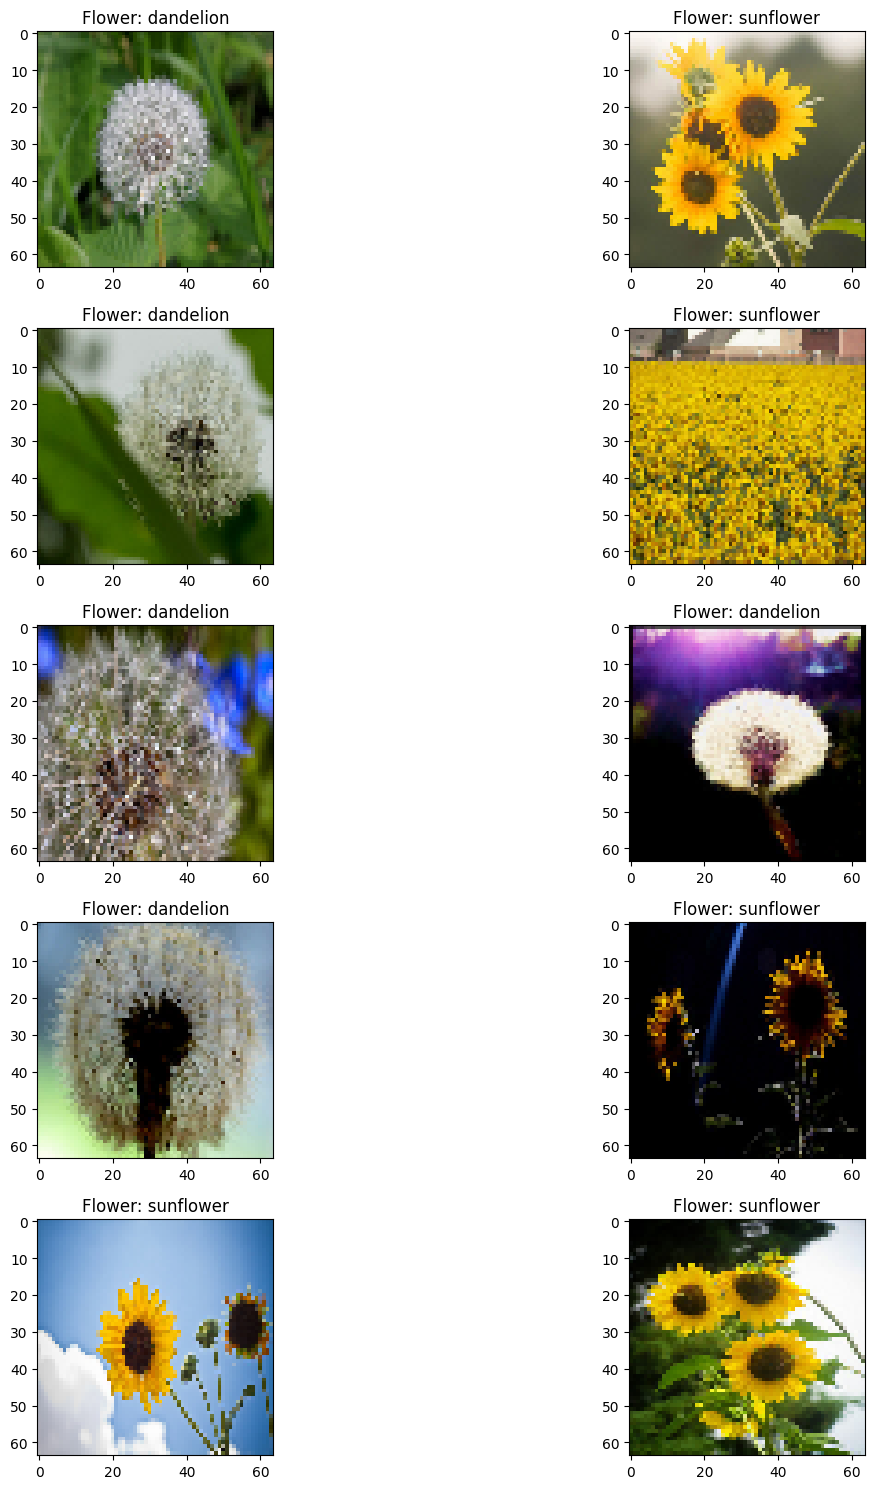

In [52]:
# few images of flowers with their labels:
import random as rn
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(label))
        ax[i,j].imshow(data[l])
        ax[i,j].set_title('Flower: '+label[l])

plt.tight_layout()

In [53]:
# convert tha data and its label to numpy array:
data_arr = np.array(data)
label_arr = np.array(label)

In [54]:
# Assuming label_arr is your numpy array containing labels
unique_labels = np.unique(label_arr)

# Print the unique labels
print("Unique Labels:", unique_labels)

Unique Labels: ['dandelion' 'sunflower']


In [55]:
le=LabelEncoder()
Y=le.fit_transform(label_arr)
Y=to_categorical(Y,2)
print(Y.shape)

(1785, 2)


In [56]:
X = data_arr/255

In [60]:
# Splitting the data into training and its testing parts:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [61]:
# shapes of testing and training data for x and y after splitting:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (1338, 64, 64, 3), y_train shape: (1338, 2)
X_test shape: (447, 64, 64, 3), y_test shape: (447, 2)


In [65]:
# Model architecture
model = Sequential()
# First convolutional layer
model.add(Conv2D(filters=64, kernel_size=3, input_shape=[64, 64, 3]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

# # Second convolutional layer
model.add(Conv2D(filters=128, kernel_size=3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

# dropout layer
model.add(Dropout(0.5))

# # third convolutional layer
model.add(Conv2D(filters=256, kernel_size=3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

# FLatten layer ------2D TO 1D
model.add(Flatten())
# input layer
model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())
# Final output layer
model.add(Dense(units=2, activation='softmax'))

In [66]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 62, 62, 64)        1792      
                                                                 
 batch_normalization_20 (Ba  (None, 62, 62, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_15 (Activation)  (None, 62, 62, 64)        0         
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 31, 31, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 29, 29, 128)       73856     
                                                                 
 batch_normalization_21 (Ba  (None, 29, 29, 128)      

In [67]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [68]:
model.fit(X_train,y_train,batch_size=32,epochs=25,validation_split=0.15)

Epoch 1/25


2023-11-14 21:07:26.810112: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_5/dropout_5/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


36/36 [==============================] - 4s 25ms/step - loss: 0.4917 - accuracy: 0.7766 - val_loss: 0.8883 - val_accuracy: 0.5871
Epoch 2/25
36/36 [==============================] - 0s 12ms/step - loss: 0.3245 - accuracy: 0.8619 - val_loss: 1.1751 - val_accuracy: 0.5871
Epoch 3/25
36/36 [==============================] - 0s 12ms/step - loss: 0.2785 - accuracy: 0.8865 - val_loss: 1.5695 - val_accuracy: 0.5871
Epoch 4/25
36/36 [==============================] - 0s 12ms/step - loss: 0.2836 - accuracy: 0.8927 - val_loss: 1.4549 - val_accuracy: 0.5871
Epoch 5/25
36/36 [==============================] - 0s 12ms/step - loss: 0.2376 - accuracy: 0.9050 - val_loss: 1.6749 - val_accuracy: 0.5871
Epoch 6/25
36/36 [==============================] - 0s 12ms/step - loss: 0.2025 - accuracy: 0.9120 - val_loss: 2.2692 - val_accuracy: 0.5871
Epoch 7/25
36/36 [==============================] - 0s 12ms/step - loss: 0.2072 - accuracy: 0.9217 - val_loss: 2.3876 - val_accuracy: 0.5871
Epoch 8/25
36/36 [======

In [69]:
# predict the test accuracy for model
model.evaluate(X_test,y_test)

14/14 [==============================] - 0s 10ms/step - loss: 0.4293 - accuracy: 0.8904


[0.42927512526512146, 0.890380322933197]

In [70]:
from keras.models import load_model
# Save the model
model.save('flower.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [71]:
# getting predictions on val set.
pred=model.predict(X_test)
print("Predicted Probabilities -\n",pred[:4])
pred_digits=np.argmax(pred,axis=1)
print("\nPredicted Class [Highest Prob] -",pred_digits[:4])

14/14 [==============================] - 0s 3ms/step
Predicted Probabilities -
 [[8.3277537e-06 9.9999166e-01]
 [3.4633914e-08 1.0000000e+00]
 [3.4756691e-04 9.9965239e-01]
 [9.9998200e-01 1.7941189e-05]]

Predicted Class [Highest Prob] - [1 1 1 0]


In [72]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

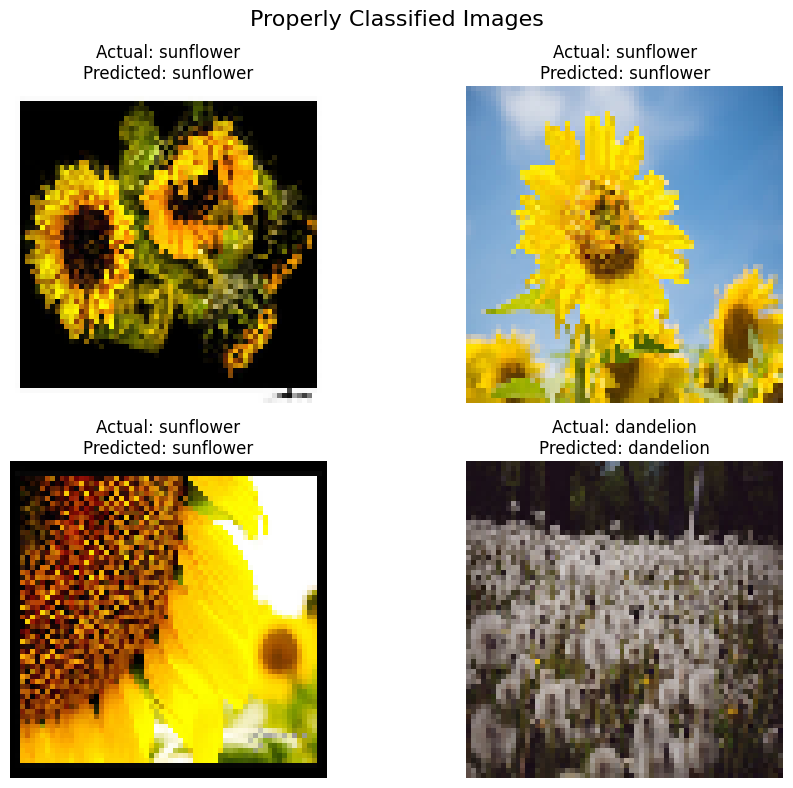

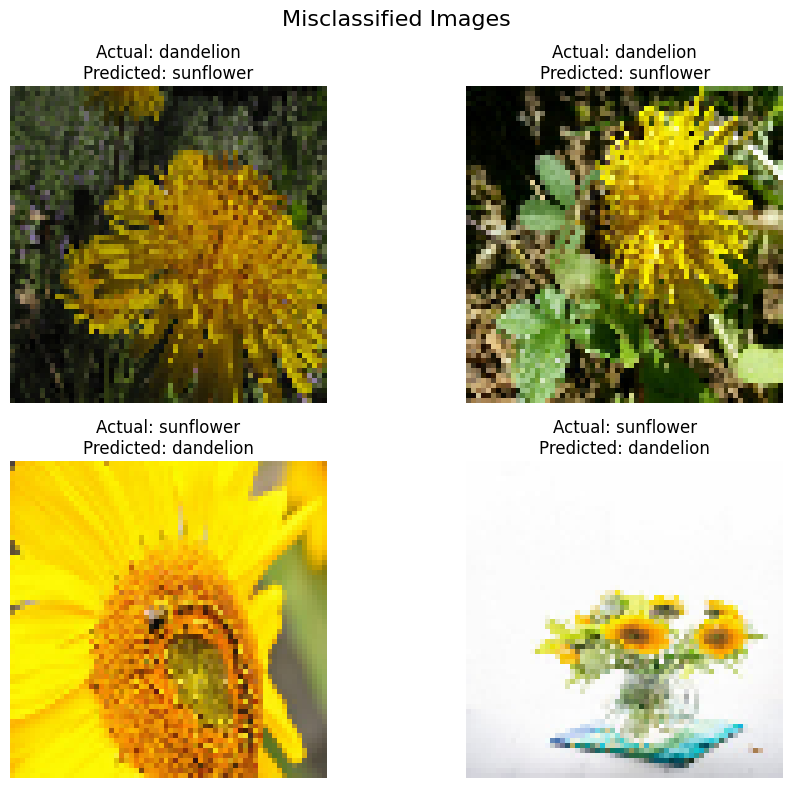

In [73]:
import matplotlib.pyplot as plt

# Display properly classified images
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Properly Classified Images', fontsize=16)

for i, idx in enumerate(prop_class[:4]):
    axes[i // 2, i % 2].imshow(X_test[idx])
    axes[i // 2, i % 2].set_title(f"Actual: {le.inverse_transform([np.argmax(y_test[idx])])[0]}\n"
                                  f"Predicted: {le.inverse_transform([pred_digits[idx]])[0]}")
    axes[i // 2, i % 2].axis('off')

plt.tight_layout()
plt.show()

# Display misclassified images
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Misclassified Images', fontsize=16)

for i, idx in enumerate(mis_class[:4]):
    axes[i // 2, i % 2].imshow(X_test[idx])
    axes[i // 2, i % 2].set_title(f"Actual: {le.inverse_transform([np.argmax(y_test[idx])])[0]}\n"
                                  f"Predicted: {le.inverse_transform([pred_digits[idx]])[0]}")
    axes[i // 2, i % 2].axis('off')

plt.tight_layout()
plt.show()

In [74]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
import numpy as np
from PIL import Image
from io import BytesIO
import requests

# Load the saved model
saved_model = load_model('flower.h5')

# Get the image URL from the user
image_url = input("Enter the image URL: ")

# Download and preprocess the image
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
img = img.resize((64, 64))  # Adjust the size as needed
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions using the loaded model
result = saved_model.predict(img_array)

predicted_class = np.argmax(result)
# Map the index to the corresponding label
class_labels = ['sunflower','dandelion']
predicted_label = class_labels[predicted_class]

print(f"The predicted label is: {predicted_label}")

Enter the image URL:  https://www.brightseeds.co.uk/images/products/standard/287.jpg


1/1 [==============================] - 0s 159ms/step
The predicted label is: dandelion


In [75]:
# Evaluate on the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

14/14 [==============================] - 0s 3ms/step


In [76]:
from sklearn.metrics import accuracy_score, classification_report
# Calculate and print evaluation metrics
# Evaluate on the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Convert one-hot encoded labels back to integers for y_test
y_test_int = np.argmax(y_test, axis=1)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test_int, y_pred)

print(f'Accuracy: {accuracy:.4f}')

14/14 [==============================] - 0s 3ms/step
Accuracy: 0.8904


In [77]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_int, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[234  26]
 [ 23 164]]


<Axes: >

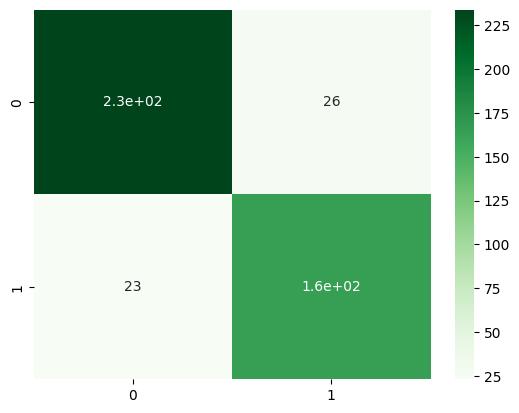

In [78]:
# graphical representation of confustion matrix for model:
import seaborn as sns
sns.heatmap(conf_matrix,annot=True,cmap="Greens")

In [79]:
# Classification Report
classification_rep = classification_report(y_test_int, y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       260
           1       0.86      0.88      0.87       187

    accuracy                           0.89       447
   macro avg       0.89      0.89      0.89       447
weighted avg       0.89      0.89      0.89       447

